# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [261]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

AINVERT_FILENAME = "ainvert.py"
PARROT_FILENAME = "parrot.bmp"
CLOCK_FILENAME = "clock.bmp"
CHESSBOARD_FILENAME = "chessboard.bmp"

for filename in [AINVERT_FILENAME, PARROT_FILENAME, CLOCK_FILENAME, CHESSBOARD_FILENAME]:
    if not os.path.exists(filename):
        r = requests.get(url + filename, allow_redirects=True)
        open(filename, 'wb').write(r.content)

In [299]:
from math import floor
from ainvert import A_invert


def d_x(image, y, x):
    try: return (image[y, x + 1].astype(np.float64) - image[y, x - 1]) / 2
    except IndexError: return 0

def d_y(image, y, x):
    try: return (image[y + 1, x].astype(np.float64) - image[y - 1, x]) / 2
    except IndexError: return 0

def d_xy(image, y, x):
    try: return (image[y + 1, x + 1].astype(np.float64) - image[y - 1, x] - image[y, x - 1] + image[y, x]) / 4
    except IndexError: return 0


def bicubic_interpolation(image, horizontal_scale: float, vertical_scale: float):
    y_org, x_org = image.shape
    y_goal, x_goal = [round(z) for z in [y_org * vertical_scale, x_org * horizontal_scale]]

    result_image = np.zeros(shape = (y_goal, x_goal), dtype = np.float64)

    for y in range(y_goal):
        for x in range(x_goal):
            x_exact = x / horizontal_scale
            x_prev = floor(x_exact)
            x_next = min(x_prev + 1, x_org - 1)
            x_part = x_exact - x_prev

            y_exact = y / vertical_scale
            y_prev = floor(y_exact)
            y_next = min(y_prev + 1, y_org - 1)
            y_part = y_exact - y_prev

            ABDC = [
                (y_prev, x_prev),
                (y_prev, x_next),
                (y_next, x_prev),
                (y_next, x_next),
            ]

            x_array = np.array([
                [image[y][x] for y, x in ABDC] + 
                [d_x(image, y, x) for y, x in ABDC] +
                [d_y(image, y, x) for y, x in ABDC] +
                [d_xy(image, y, x) for y, x in ABDC]
            ], dtype=np.float64).T

            a_array = A_invert @ x_array

            result = 0
            for i in range(4):
                for j in range(4):
                    a = a_array[4 * j + i, 0]
                    result += a * x_part ** i * y_part ** j

            result_image[y, x] = min(255, max(0, result))

    return result_image

In [300]:
def show_image_real_size(image, size_per_pixel: float = 8e-3, is_grayscale: bool = True, title: str = None):
    y, x = image.shape
    plt.figure(figsize=(size_per_pixel * y, size_per_pixel * x), dpi=200)
    plt.title(title)
    plt.imshow(image, cmap = "gray" if is_grayscale else None)
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()

def present_scaling(image, scales, size_per_pixel: float, is_grayscale: bool = True):
    for scale in scales:
        if scale is None:
            title = "Original image"
            scaled_image = image
        else:
            horizontal_scale, vertical_scale = scale
            title = f"scale: {horizontal_scale, vertical_scale}"
            scaled_image = bicubic_interpolation(image, horizontal_scale, vertical_scale)

        show_image_real_size(scaled_image, size_per_pixel, is_grayscale, title)

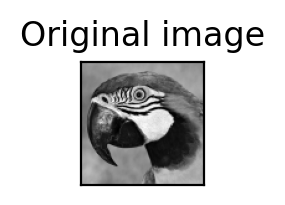

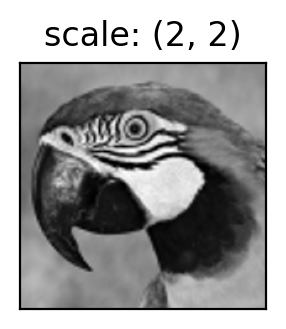

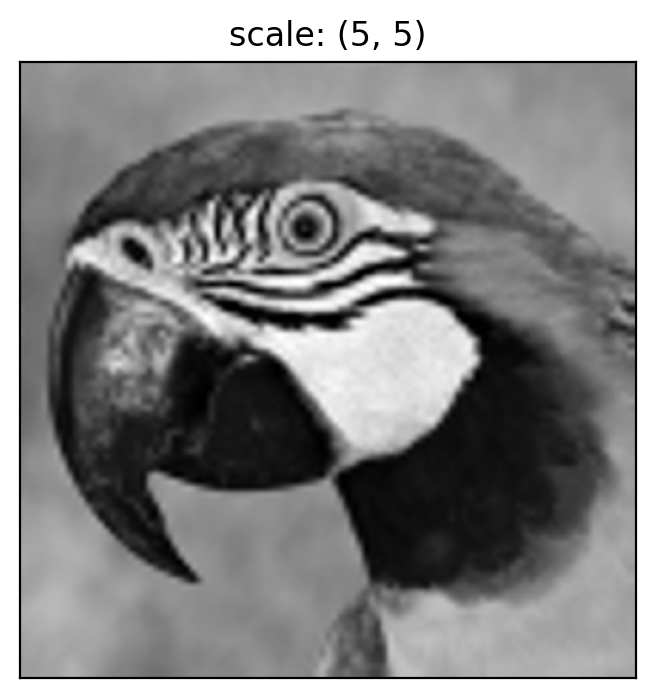

In [303]:
parrot_image = cv2.cvtColor(cv2.imread(PARROT_FILENAME), cv2.COLOR_RGB2GRAY)

present_scaling(
    image = parrot_image,
    scales = [
        None,
        (2, 2),
        (5, 5),
    ],
    size_per_pixel = 8e-3,
)

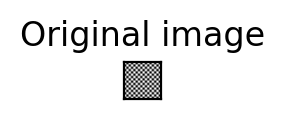

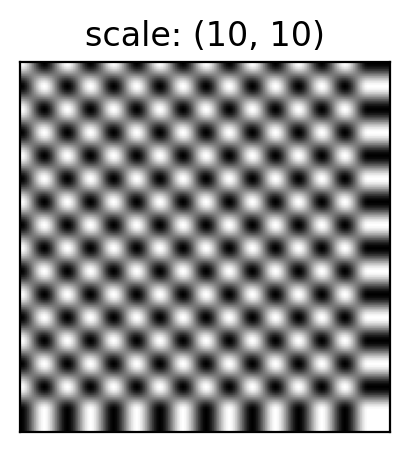

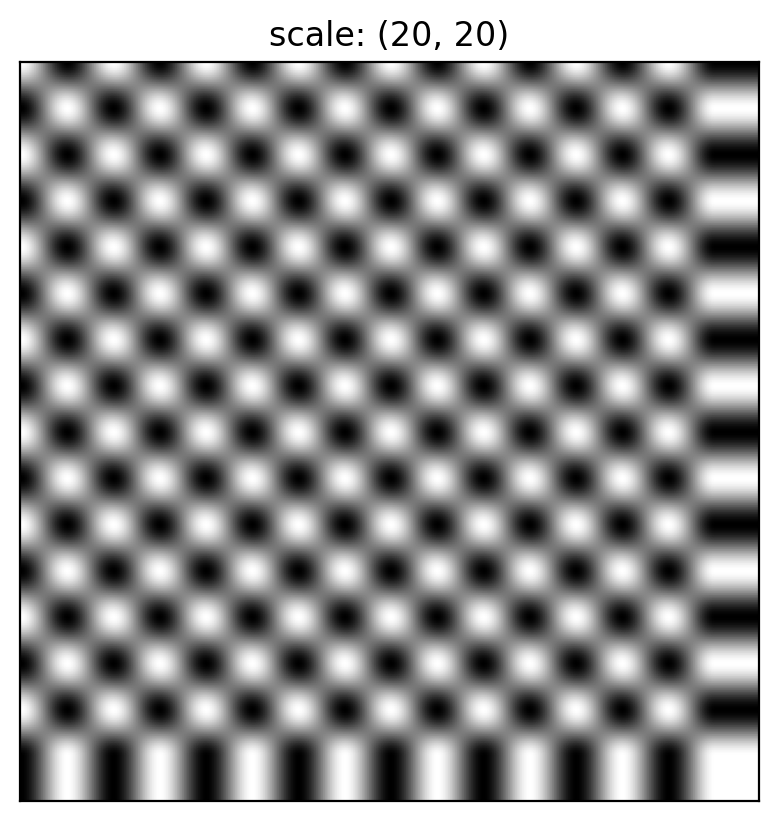

In [302]:
chessboard_image = cv2.cvtColor(cv2.imread(CHESSBOARD_FILENAME), cv2.COLOR_RGB2GRAY)

present_scaling(
    image = chessboard_image,
    scales = [
        None,
        (10, 10),
        (20, 20),
    ],
    size_per_pixel = 1.5e-2,
)

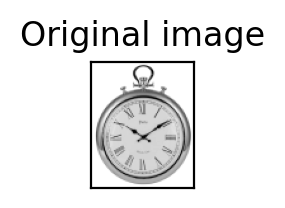

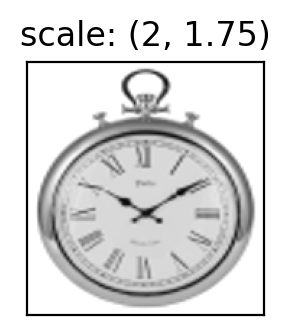

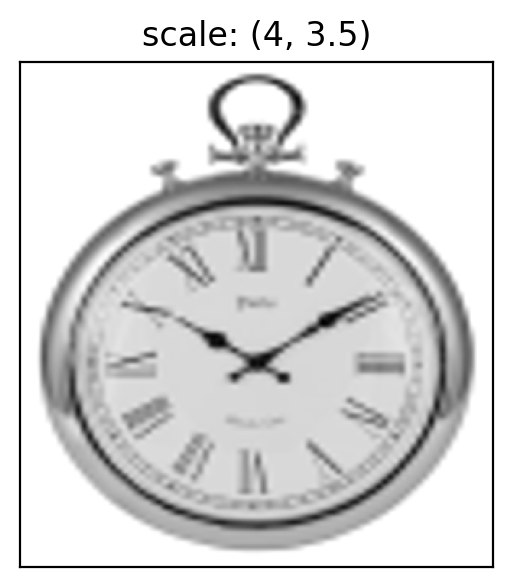

In [306]:
clock_image = cv2.cvtColor(cv2.imread(CLOCK_FILENAME), cv2.COLOR_RGB2GRAY)

present_scaling(
    image = clock_image,
    scales = [
        None,
        (2, 1.75),
        (4, 3.5),
    ],
    size_per_pixel = 1e-2,
)

## Porównanie z interpolacją dwuliniową

In [309]:
def bilinear_interpolation(image, horizontal_scale: float, vertical_scale: float):
    y_org, x_org = image.shape
    y_goal, x_goal = [round(z) for z in [y_org * vertical_scale, x_org * horizontal_scale]]

    result_image = np.zeros(shape = (y_goal, x_goal), dtype = image.dtype)

    for y in range(y_goal):
        for x in range(x_goal):
            # `0.5` for centring on a pixel center, not its coordinates
            x_exact = (x + 0.5) / horizontal_scale
            x_prev = floor(x_exact) - 1 if x_exact % 1 <= 0.5 else floor(x_exact)
            x_next = x_prev + 1

            y_exact = (y + 0.5) / vertical_scale
            y_prev = floor(y_exact) - 1 if y_exact % 1 <= 0.5 else floor(y_exact)
            y_next = y_prev + 1

            # For border cases *_prev should be equal *_next
            x_prev = max(0, x_prev)
            y_prev = max(0, y_prev)
            x_next = min(x_org - 1, x_next)
            y_next = min(y_org - 1, y_next)
            
            upper_left = image[y_prev, x_prev]
            upper_right = image[y_prev, x_next]

            lower_left = image[y_next, x_prev]
            lower_right = image[y_next, x_next]

            x_prev += 0.5
            x_next += 0.5
            y_prev += 0.5
            y_next += 0.5

            # Border cases: there is just 1 neighbouring pixel instead of 2
            if x_prev == x_next:
                upper = upper_left
                lower = lower_left
            # Ordinary case 
            else:
                upper = (x_next - x_exact) * upper_left + (x_exact - x_prev) * upper_right
                lower = (x_next - x_exact) * lower_left + (x_exact - x_prev) * lower_right

            # Border case 
            if y_prev == y_next:
                result = upper
            # Ordinary case 
            else:
                result = (y_next - y_exact) * upper + (y_exact - y_prev) * lower

            result_image[y, x] = result
            
    return result_image

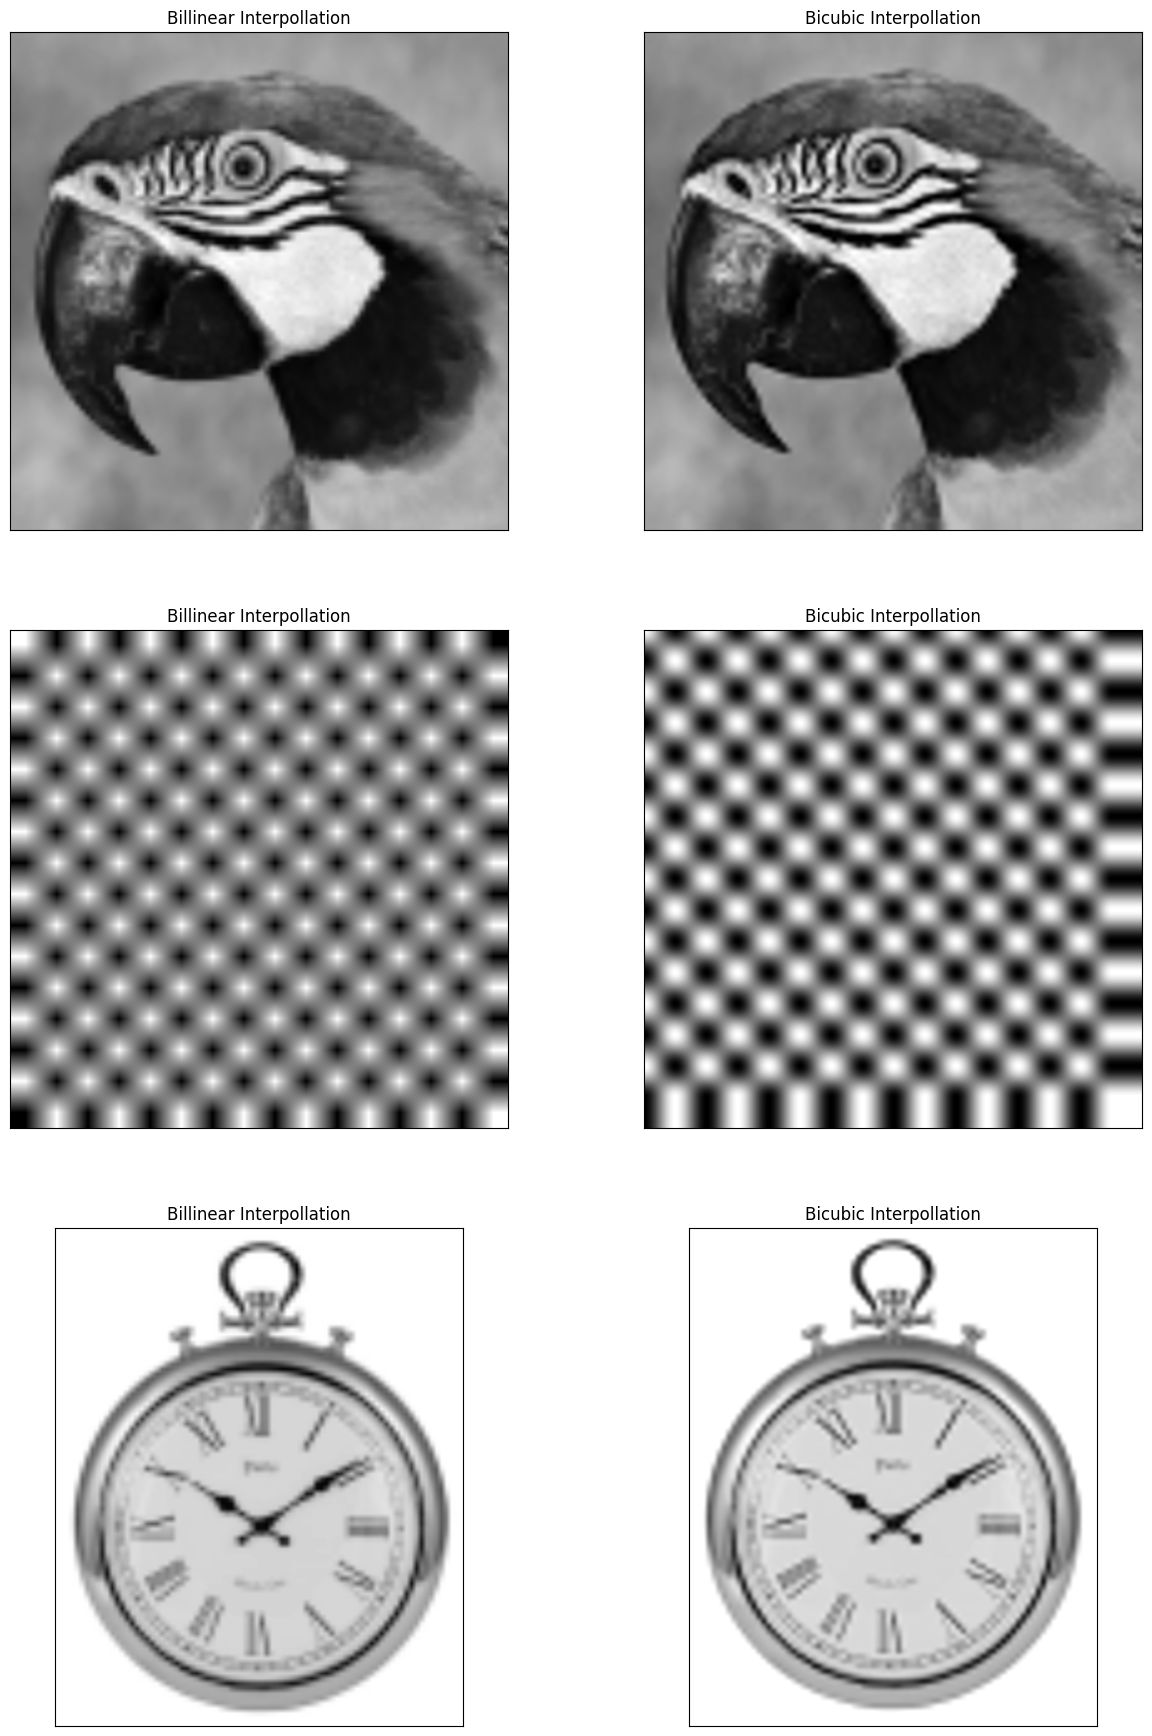

In [314]:
IMAGES = [parrot_image, chessboard_image, clock_image]

fig, axs = plt.subplots(ncols = 2, nrows = len(IMAGES), figsize = (15, 22))

for image, ax_row in zip(IMAGES, axs):
    for (interpolation_name, interpolation_fun), ax in zip([
        ("Billinear", bilinear_interpolation), 
        ("Bicubic", bicubic_interpolation),
    ], ax_row):
        scale = 1000 / image.shape[1]
        scaled_image = interpolation_fun(image, scale, scale)

        ax.set_title(f"{interpolation_name} Interpollation")
        ax.set_xticks([]), ax.set_yticks([])
        ax.imshow(scaled_image, cmap="gray")